In [1]:
"""
importing necessary module
"""

'\nimporting necessary module\n'

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv("H:\\conda\\Machine_Learning\\archive\\income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
data.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

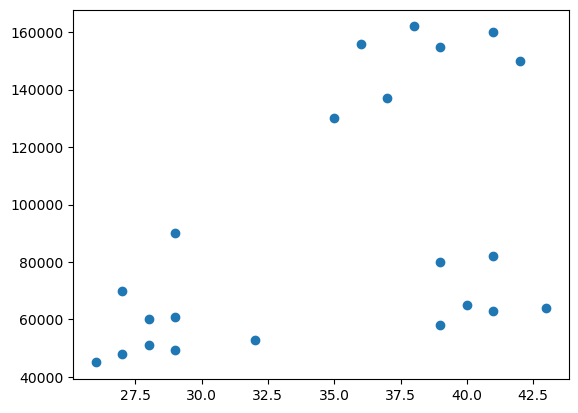

In [8]:
## ploting scatter 
plt.scatter(data['Age'],data['Income($)'])
plt.show()

In [24]:
kmns=KMeans(n_clusters=3)
kmns

KMeans(n_clusters=3)

In [25]:
y_predict=kmns.fit_predict(data[['Age','Income($)']])
y_predict

H:\conda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
H:\conda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [26]:
data['Cluster']=y_predict
data.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [28]:
kmns.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

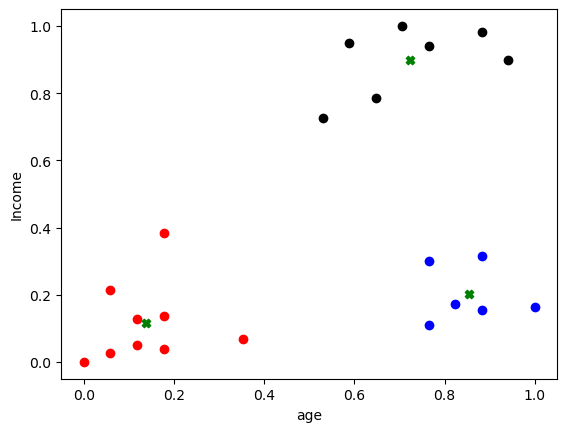

In [29]:
c1=data[data['Cluster']==0]
c2=data[data['Cluster']==1]
c3=data[data['Cluster']==2]

plt.scatter(c1.Age,c1['Income($)'], color='red')
plt.scatter(c2.Age,c2['Income($)'], color='blue')
plt.scatter(c3.Age,c3['Income($)'], color='black')
plt.scatter(kmns.cluster_centers_[:,0],kmns.cluster_centers_[:,1],marker='X',color='green')

plt.xlabel('age')
plt.ylabel('Income')
plt.show()

In [23]:
scaler=MinMaxScaler()
data['Income($)']=scaler.fit_transform(data[['Income($)']])
data['Age']=scaler.fit_transform(data[['Age']])
data.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [40]:
krange=range(1,10)
SSE=[] # sum of squared error
for k in krange:
    kmns=KMeans(n_clusters=k,n_init='auto') # creating a model in every iteration
    kmns.fit(data[['Age','Income($)']])
    SSE.append(kmns.inertia_) # it will deliver the sum of squared errors

H:\conda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
H:\conda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
H:\conda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
H:\conda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

In [35]:
SSE

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278,
 0.2157860776587302,
 0.16858512236029757,
 0.13265419827245162,
 0.10383752586603559]

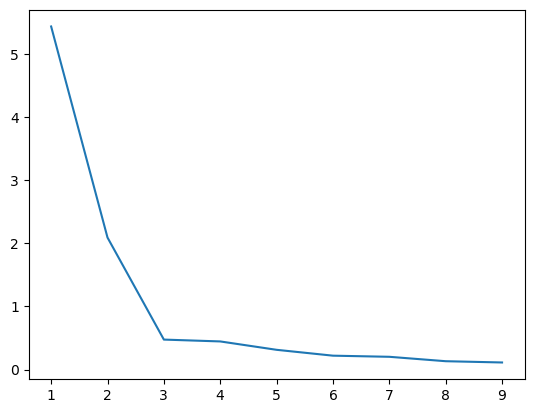

In [41]:
plt.plot(krange,SSE)

In [38]:
#optimized no of clusters:: 3